## Load Data

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
donor = pd.read_csv("/Users/zhenyuan/Desktop/stern_ra/education/merged_new.csv")
donor = donor.dropna().reset_index()
donor["school_ncesid"] = pd.to_numeric(donor["school_ncesid"], errors='coerce')
donor["ncesid"] = donor["school_ncesid"]//100000
edu = pd.read_csv("/Users/zhenyuan/Desktop/stern_ra/education/seda_cov_geodist_pool_4.1.csv")
edu.dropna(subset=['stateabb'],inplace=True)
data = pd.merge(donor,edu,how='left',left_on="ncesid",right_on="sedalea")
data.dropna(subset=["stateabb"],inplace=True)

In [121]:
gender_nlp = donor.copy()
gender_nlp = gender_nlp[gender_nlp["teacher_prefix"]!='Dr.']
conditions = [(gender_nlp['teacher_prefix']=="Mrs.")|(gender_nlp['teacher_prefix']=="Ms."),
              (gender_nlp['teacher_prefix']=="Mr.")]
values = [0,1]
gender_nlp["gender"] = np.select(conditions,values)
gender_nlp = gender_nlp[["title","short_description","need_statement","essay","gender"]]
gender_nlp = pd.concat([gender_nlp[gender_nlp["gender"]==0].sample(n=2761, random_state=1234),
                        gender_nlp[gender_nlp["gender"]==1]],axis=0).reset_index(drop=True)

In [130]:
from sklearn.utils import shuffle
gender_nlp = shuffle(gender_nlp,random_state=1234).reset_index(drop=True)
gender_nlp.head()

,title,short_description,need_statement,essay,gender
0,ESE Guitar Ensemble,My students have not discovered the emotions a...,My students need at least 3 guitars to start o...,My students have not discovered the emotions a...,1
1,Much Needed Cross-Curriculum Classroom Technology,Do you remember how exciting it was when it wa...,My students need 3 classroom computers.,Do you remember how exciting it was when it wa...,1
2,Help Our Classroom Library!,Please consider helping transform our class li...,My students need a more modern class library.,Have you ever wandered through your library th...,1
3,New Teacher! No Stuff!,My project needs a Reading for Detail Teaching...,My students need one Reading for Detail Teachi...,This is a very exciting position for me this y...,0
4,Providing Paper: Basic Supplies for Student Ac...,My students are in much need of copy paper for...,My students need 15 reams of copy paper.,"Hello! First of all, thank you for taking the...",1


In [131]:
gender_nlp = gender_nlp.rename(columns={"gender":"label"})
gender_nlp.dropna(inplace=True)
gender_nlp.reset_index(inplace=True,drop=True)
from sklearn.model_selection import train_test_split
train, rem = train_test_split(gender_nlp, train_size=0.6,random_state=1234)
val, test = train_test_split(rem, train_size=0.5,random_state=1234)
train.reset_index(inplace=True,drop=True)
val.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [133]:
header = ["title","short_description","need_statement","essay","label"]
with open('/Users/zhenyuan/Desktop/stern_ra/education/data/train.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header) 
    for i,row in train.iterrows():
        writer.writerow(row)
with open('/Users/zhenyuan/Desktop/stern_ra/education/data/val.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header) 
    for i,row in val.iterrows():
        writer.writerow(row)
with open('/Users/zhenyuan/Desktop/stern_ra/education/data/test.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header) 
    for i,row in test.iterrows():
        writer.writerow(row)

In [127]:
# top20 = edu[["stateabb","perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
#  "unempavgall","povertyavgall","single_momavgall"]].groupby('stateabb').quantile(.8)
# bot20 = edu[["stateabb","perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
#  "unempavgall","povertyavgall","single_momavgall"]].groupby('stateabb').quantile(.2)
# data = pd.merge(data,top20,how='left', on="stateabb",suffixes=('', '_top20'))
# data = pd.merge(data,bot20,how='left', on="stateabb",suffixes=('', '_bot20'))

In [128]:
# cols = ["perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
#         "unempavgall","povertyavgall","single_momavgall"]
# for col in cols:
#     data.loc[(data[col] >= data[col+'_top20']),col+'_Per'] = 1
#     data.loc[(data[col] < data[col+'_bot20']),col+'_Per'] = 0
#     data[col+'_Per'].fillna(99, inplace=True)
# data = data[["index","title","short_description","need_statement","essay",
#              'perblk_Per', 'perwht_Per', 'perfl_Per',
#        'sesavgall_Per', 'lninc50avgall_Per', 'snapavgall_Per',
#        'unempavgall_Per', 'povertyavgall_Per', 'single_momavgall_Per']]

In [129]:
# data1 = data[data["lninc50avgall_Per"]!=99][["title","short_description","need_statement","essay","lninc50avgall_Per"]]
# data1 = data1.rename(columns={"lninc50avgall_Per":"label"})
# # data1["label"] = data1["label"].replace([0,1], ["bot", "top"])
# data1.dropna(inplace=True)
# data1.reset_index(inplace=True,drop=True)
# from sklearn.model_selection import train_test_split
# train, rem = train_test_split(data1, train_size=0.01,random_state=1234)
# val, rem = train_test_split(rem, train_size=0.01,random_state=1234)
# test, rem = train_test_split(rem, train_size=0.01,random_state=1234)
# train.reset_index(inplace=True,drop=True)
# val.reset_index(inplace=True,drop=True)
# test.reset_index(inplace=True,drop=True)

In [134]:
# header = ["title","short_description","need_statement","essay","label"]
# with open('/Users/zhenyuan/Desktop/stern_ra/education/data/train.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(header) 
#     for i,row in train.iterrows():
#         writer.writerow(row)
# with open('/Users/zhenyuan/Desktop/stern_ra/education/data/val.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(header) 
#     for i,row in val.iterrows():
#         writer.writerow(row)
# with open('/Users/zhenyuan/Desktop/stern_ra/education/data/test.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(header) 
#     for i,row in test.iterrows():
#         writer.writerow(row)

## Bert

In [60]:
## https://github.com/dhlee347/pytorchic-bert
## https://github.com/cedrickchee/awesome-bert-nlp

In [135]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Preliminaries
from torchtext.data import Field, Dataset,TabularDataset, BucketIterator, Iterator

# Models
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training
import torch.optim as optim

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [136]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
device = 'cpu'

# Model parameter
MAX_SEQ_LEN = 512
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)



label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('title', text_field), ('short_description', text_field), 
          ('need_statement', text_field),('essay', text_field),('label', label_field)]

# TabularDataset

train = Dataset(train,fields=fields)
validation = Dataset(val,fields=fields)
test = Dataset(test,fields=fields)
train, validation, test = TabularDataset.splits(path="/Users/zhenyuan/Desktop/stern_ra/education/data/", 
                                                train='train.csv',validation='val.csv', test='test.csv',
                                                format='CSV', fields=fields, skip_header=True)

# Iterators

train_iter = BucketIterator(train, batch_size=10, sort_key=lambda x: len(x.title),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(validation, batch_size=10, sort_key=lambda x: len(x.title),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=10, device=device, train=False, shuffle=False, sort=False)


Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (544 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (585 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (517 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (893 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (531 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (556 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (580 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (646 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (542 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (683 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (529 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (613 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (623 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (617 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (556 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (551 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (530 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (534 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (521 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (579 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (549 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (558 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (529 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (583 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (663 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (553 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (524 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (551 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (672 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (636 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (766 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (674 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (551 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (553 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (887 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (693 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (567 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (655 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (742 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (579 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (571 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (605 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (585 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (542 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (583 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (511 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (511 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (539 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (615 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (567 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (588 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (594 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (742 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (557 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (541 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (556 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (563 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (521 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (627 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

In [65]:
class BERT(nn.Module):

    def __init__(self):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]
        

        return loss, text_fea

In [66]:
# Save and Load Functions

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [137]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = "/Users/zhenyuan/Desktop/stern_ra/education/results",
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []
    
    # training loop
    model.train()
    for epoch in range(num_epochs):
        for i in train_loader:
            labels = i.label.type(torch.LongTensor)           
            labels = labels.to(device)
            text = i.essay.type(torch.LongTensor)  
            text = text.to(device)
            output = model(text, labels)
            loss, _ = output

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validation loop
                    for i in valid_loader:
                        labels = i.label.type(torch.LongTensor)           
                        labels = labels.to(device)
                        text = i.essay.type(torch.LongTensor)  
                        text = text.to(device)
                        output = model(text, labels)
                        loss, _ = output
                        
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
                    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

model = BERT().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch [1/5], Step [166/1660], Train Loss: 0.6652, Valid Loss: 0.6190
Model saved to ==> /Users/zhenyuan/Desktop/stern_ra/education/results/model.pt
Model saved to ==> /Users/zhenyuan/Desktop/stern_ra/education/results/metrics.pt
Epoch [1/5], Step [332/1660], Train Loss: 0.6035, Valid Loss: 0.5353
Model saved to ==> /Users/zhenyuan/Desktop/stern_ra/education/results/model.pt
Model saved to ==> /Users/zhenyuan/Desktop/stern_ra/education/results/metrics.pt
Epoch [2/5], Step [498/1660], Train Loss: 0.5383, Valid Loss: 0.5368
Epoch [2/5], Step [664/1660], Train Loss: 0.4573, Valid Loss: 0.5674
Epoch [3/5], Step [830/1660], Train Loss: 0.3783, Valid Loss: 0.6453
Epoch [3/5], Step [996/1660], Train Loss: 0.2997, Valid Loss: 0.6136
Epoch [4/5], Step [1162/1660], Train Loss: 0.2807, Valid Loss: 0.6701
Epoch [4/5], Step [1328/1660], Train Loss: 0.2022, Valid Loss: 0.7451
Epoch [5/5], Step [1494/1660], Train Loss: 0.1655, Valid Loss: 0.8926
Epoch [5/5], Step [1660/1660], Train Loss: 0.1764, Valid

Model loaded from <== /Users/zhenyuan/Desktop/stern_ra/education/results/metrics.pt


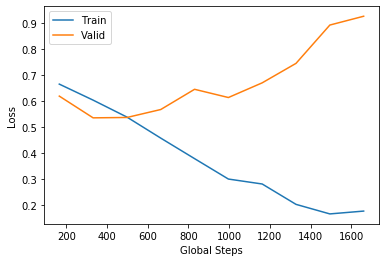

In [138]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics("/Users/zhenyuan/Desktop/stern_ra/education/results" + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Model loaded from <== /Users/zhenyuan/Desktop/stern_ra/education/results/model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.7370    0.7057    0.7210       564
           0     0.7062    0.7375    0.7215       541

    accuracy                         0.7213      1105
   macro avg     0.7216    0.7216    0.7213      1105
weighted avg     0.7219    0.7213    0.7213      1105



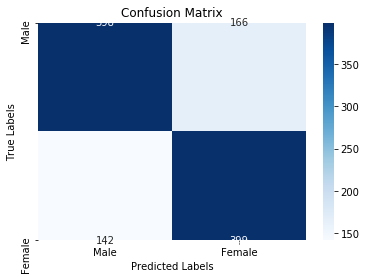

In [140]:
# Evaluation Function

def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for i in test_loader:
                labels = i.label.type(torch.LongTensor)           
                labels = labels.to(device)
                text = i.essay.type(torch.LongTensor)  
                text = text.to(device)
                output = model(text, labels)

                _, output = output
                y_pred.extend(torch.argmax(output, 1).tolist())
                y_true.extend(labels.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['Male', 'Female'])
    ax.yaxis.set_ticklabels(['Male', 'Female'])
    
best_model = BERT().to(device)

load_checkpoint("/Users/zhenyuan/Desktop/stern_ra/education/results" + '/model.pt', best_model)

evaluate(best_model, test_iter)